In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import random
import warnings
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (32.0, 24.0)
matplotlib.style.use('ggplot')
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    sns.set_palette(plt.rcParams['axes.color_cycle'][1:])

In [2]:
race_data = pd.read_csv('jra_race_result.csv', encoding='UTF-8')

col_name_english = {
    '開催日': 'Date', '競馬場': 'Place', 'レース番号': 'Race Number', 'レース名': 'Race Name', 'コース': 'Track Surface', 
    '周回': 'Inner/Outer Track', '距離': 'Distance', '馬場状態': 'Racecourse Condition', '賞金': 'Prize Pool', 
    '頭数': 'No. of Contestants', '着順': 'Rank', '枠番': 'Track Cat.', '馬番': 'Track No.', 
    '馬名': 'Name', '性別': 'Gender', '年齢': 'Age', '騎手': 'Jockey', 
    'タイム': 'Time', '着差': 'Physical Diff.', '通過順': 'Temp. Rank', '上り3F': 'Time (Last 600m)',
    '斤量': 'Weight', '馬体重': 'Net Weight', '増減': 'Weight Change', 
    '人気': 'Popularity', 'オッズ': 'Odds', 'ブリンカー': 'Blinkers', 
    '調教師': 'Trainer', '調教コメント': 'Comment', '調教評価': 'Grade'    
}
race_data_column_list = list(race_data.columns)
for column_index in range(len(race_data_column_list)):
    try:
        race_data_column_list[column_index] = col_name_english[race_data_column_list[column_index]]
    except KeyError as error:
        continue
race_data.columns = race_data_column_list

gender_name_english = {
    '牡': 'male/stallion',
    '牝': 'female/mare',
    'セ': 'gelding'
}
race_data['Gender'] = race_data['Gender'].apply(lambda gender: gender_name_english[gender])
race_data.describe()

,Race Number,Distance,Prize Pool,No. of Contestants,Rank,Track Cat.,Track No.,Age,Time,Time (Last 600m),Weight,Net Weight,Weight Change,Popularity,Odds
count,198401.000000,198401.000000,198401.000000,198401.000000,198401.000000,198401.000000,198401.000000,198401.000000,198401.000000,198399.000000,198401.000000,198400.000000,180511.000000,198401.000000,198393.000000
mean,6.460109,1646.762668,134.113334,14.934285,7.911815,4.739648,7.967208,3.647149,102.142797,36.288284,55.051189,470.749929,0.360011,7.939970,64.847577
std,3.479533,419.509983,444.799463,2.239396,4.466580,2.273737,4.491326,1.334869,29.180401,4.558838,1.757893,29.892183,6.725042,4.478727,93.671216
min,1.000000,1000.000000,0.000000,5.000000,1.000000,1.000000,1.000000,2.000000,54.100000,12.800000,48.000000,346.000000,-48.000000,1.000000,1.100000
25%,3.000000,1400.000000,0.000000,14.000000,4.000000,3.000000,4.000000,3.000000,81.100000,35.200000,54.000000,450.000000,-4.000000,4.000000,8.700000
50%,6.000000,1600.000000,0.000000,16.000000,8.000000,5.000000,8.000000,3.000000,99.200000,36.700000,55.000000,470.000000,0.000000,8.000000,24.600000
75%,10.000000,1800.000000,112.500000,16.000000,11.000000,7.000000,12.000000,4.000000,116.400000,38.300000,56.000000,490.000000,4.000000,12.000000,79.000000
max,12.000000,4250.000000,30000.000000,18.000000,18.000000,8.000000,18.000000,13.000000,302.000000,108.700000,63.000000,640.000000,54.000000,18.000000,999.900000


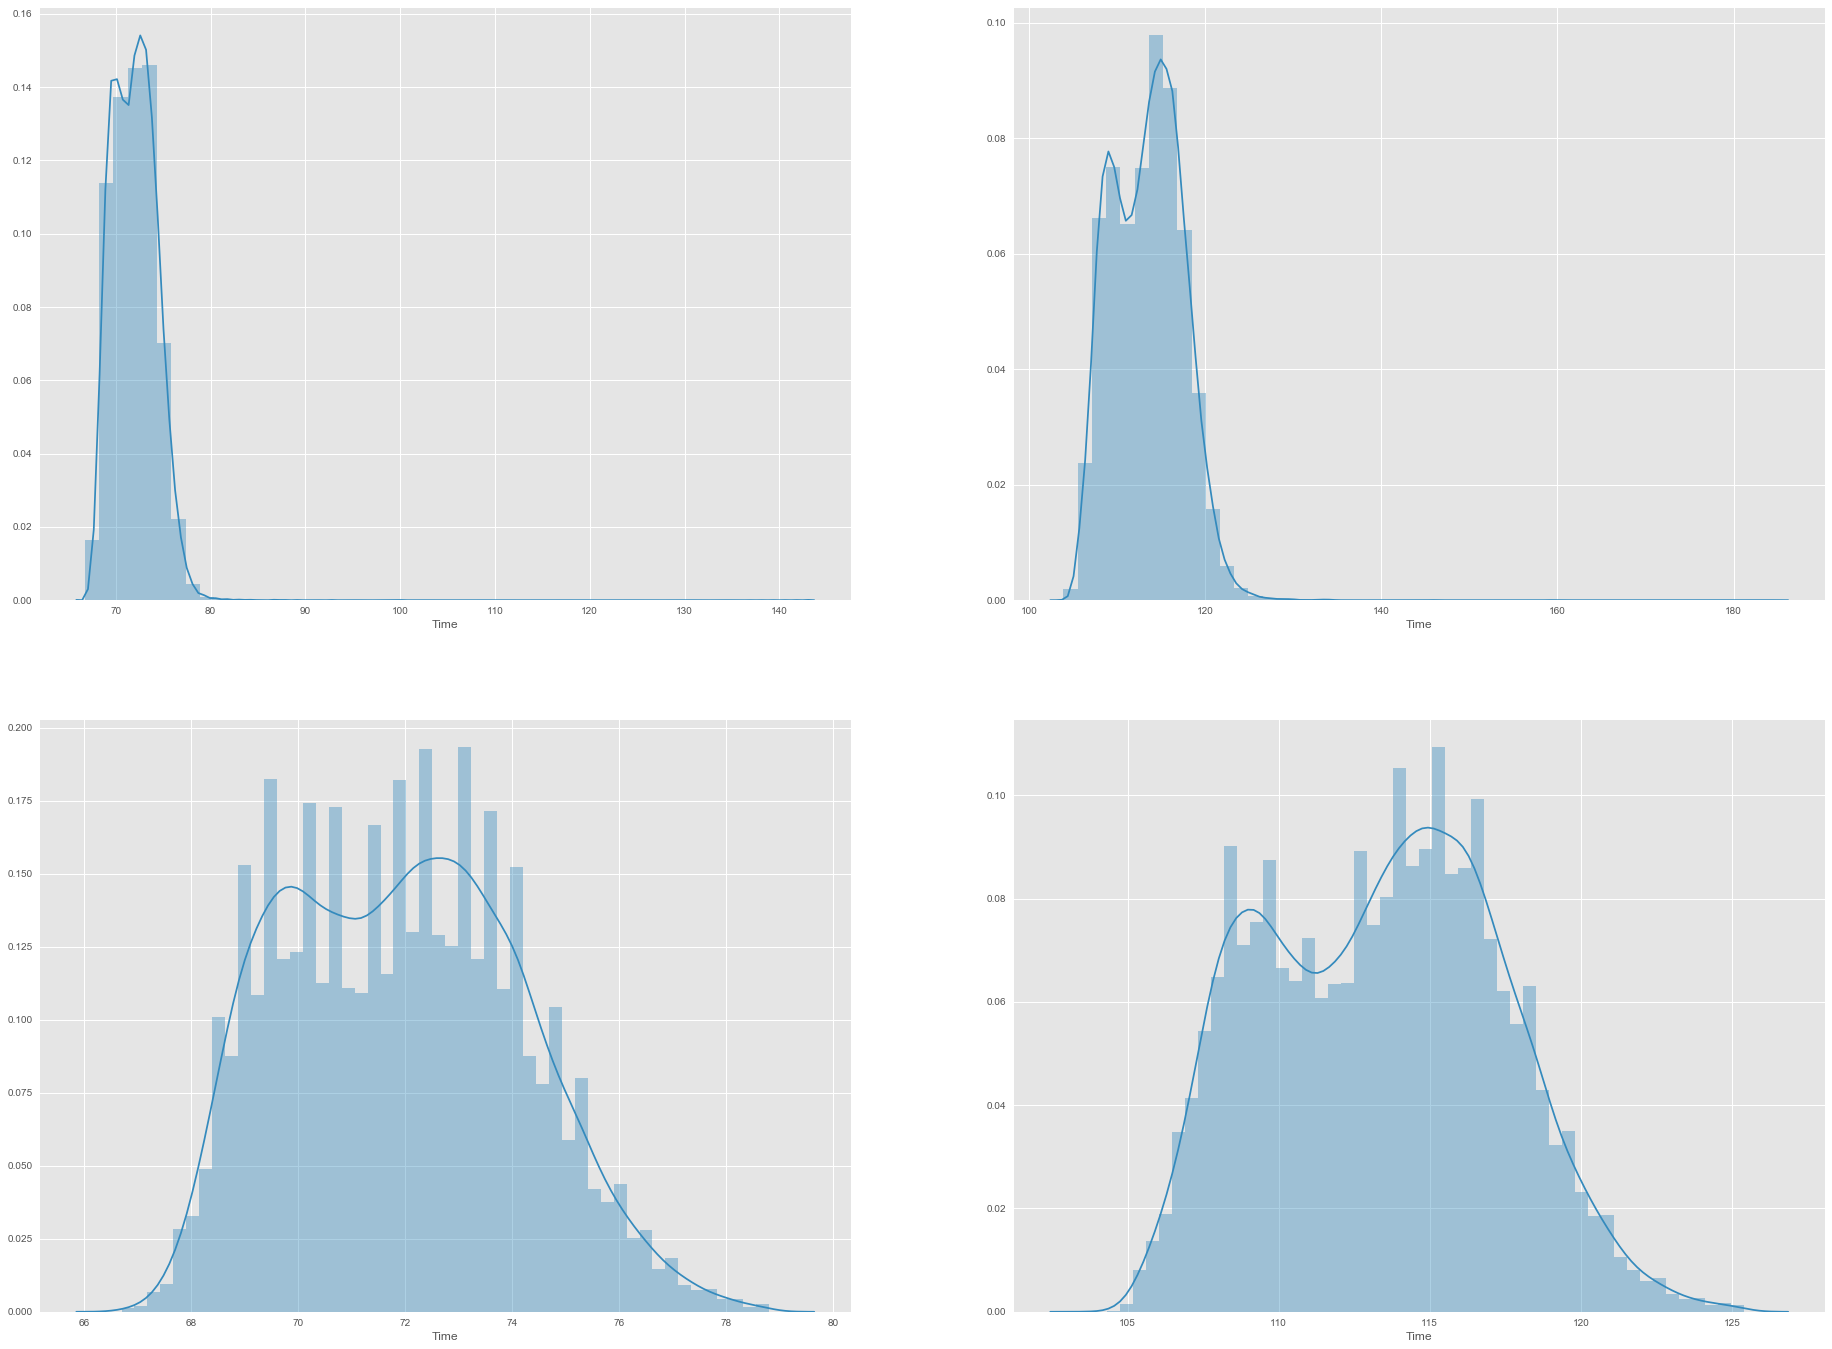

In [3]:
race_data_1200 = race_data.loc[race_data['Distance'] == 1200, :]
race_data_1800 = race_data.loc[race_data['Distance'] == 1800, :]
fig, ax = plt.subplots(2, 2)
sns.distplot(race_data_1200['Time'], ax=ax[0][0])
sns.distplot(race_data_1800['Time'], ax=ax[0][1])
sns.distplot(race_data_1200[stats.zscore(race_data_1200['Time']) < 3]['Time'], ax=ax[1][0])
sns.distplot(race_data_1800[stats.zscore(race_data_1800['Time']) < 3]['Time'], ax=ax[1][1])

In [4]:
print(stats.mstats.normaltest(race_data_1200[stats.zscore(race_data_1200['Time']) < 3]['Time']))
print(stats.mstats.normaltest(race_data_1800[stats.zscore(race_data_1800['Time']) < 3]['Time']))

NormaltestResult(statistic=1853.8720800836827, pvalue=0.0)
NormaltestResult(statistic=2642.5428275147046, pvalue=0.0)


In [5]:
race_data_1200_age_gender = race_data_1200.loc[stats.zscore(race_data_1200['Time']) < 3, ['Age', 'Gender', 'Time']]
race_data_1800_age_gender = race_data_1800.loc[stats.zscore(race_data_1800['Time']) < 3, ['Age', 'Gender', 'Time']]

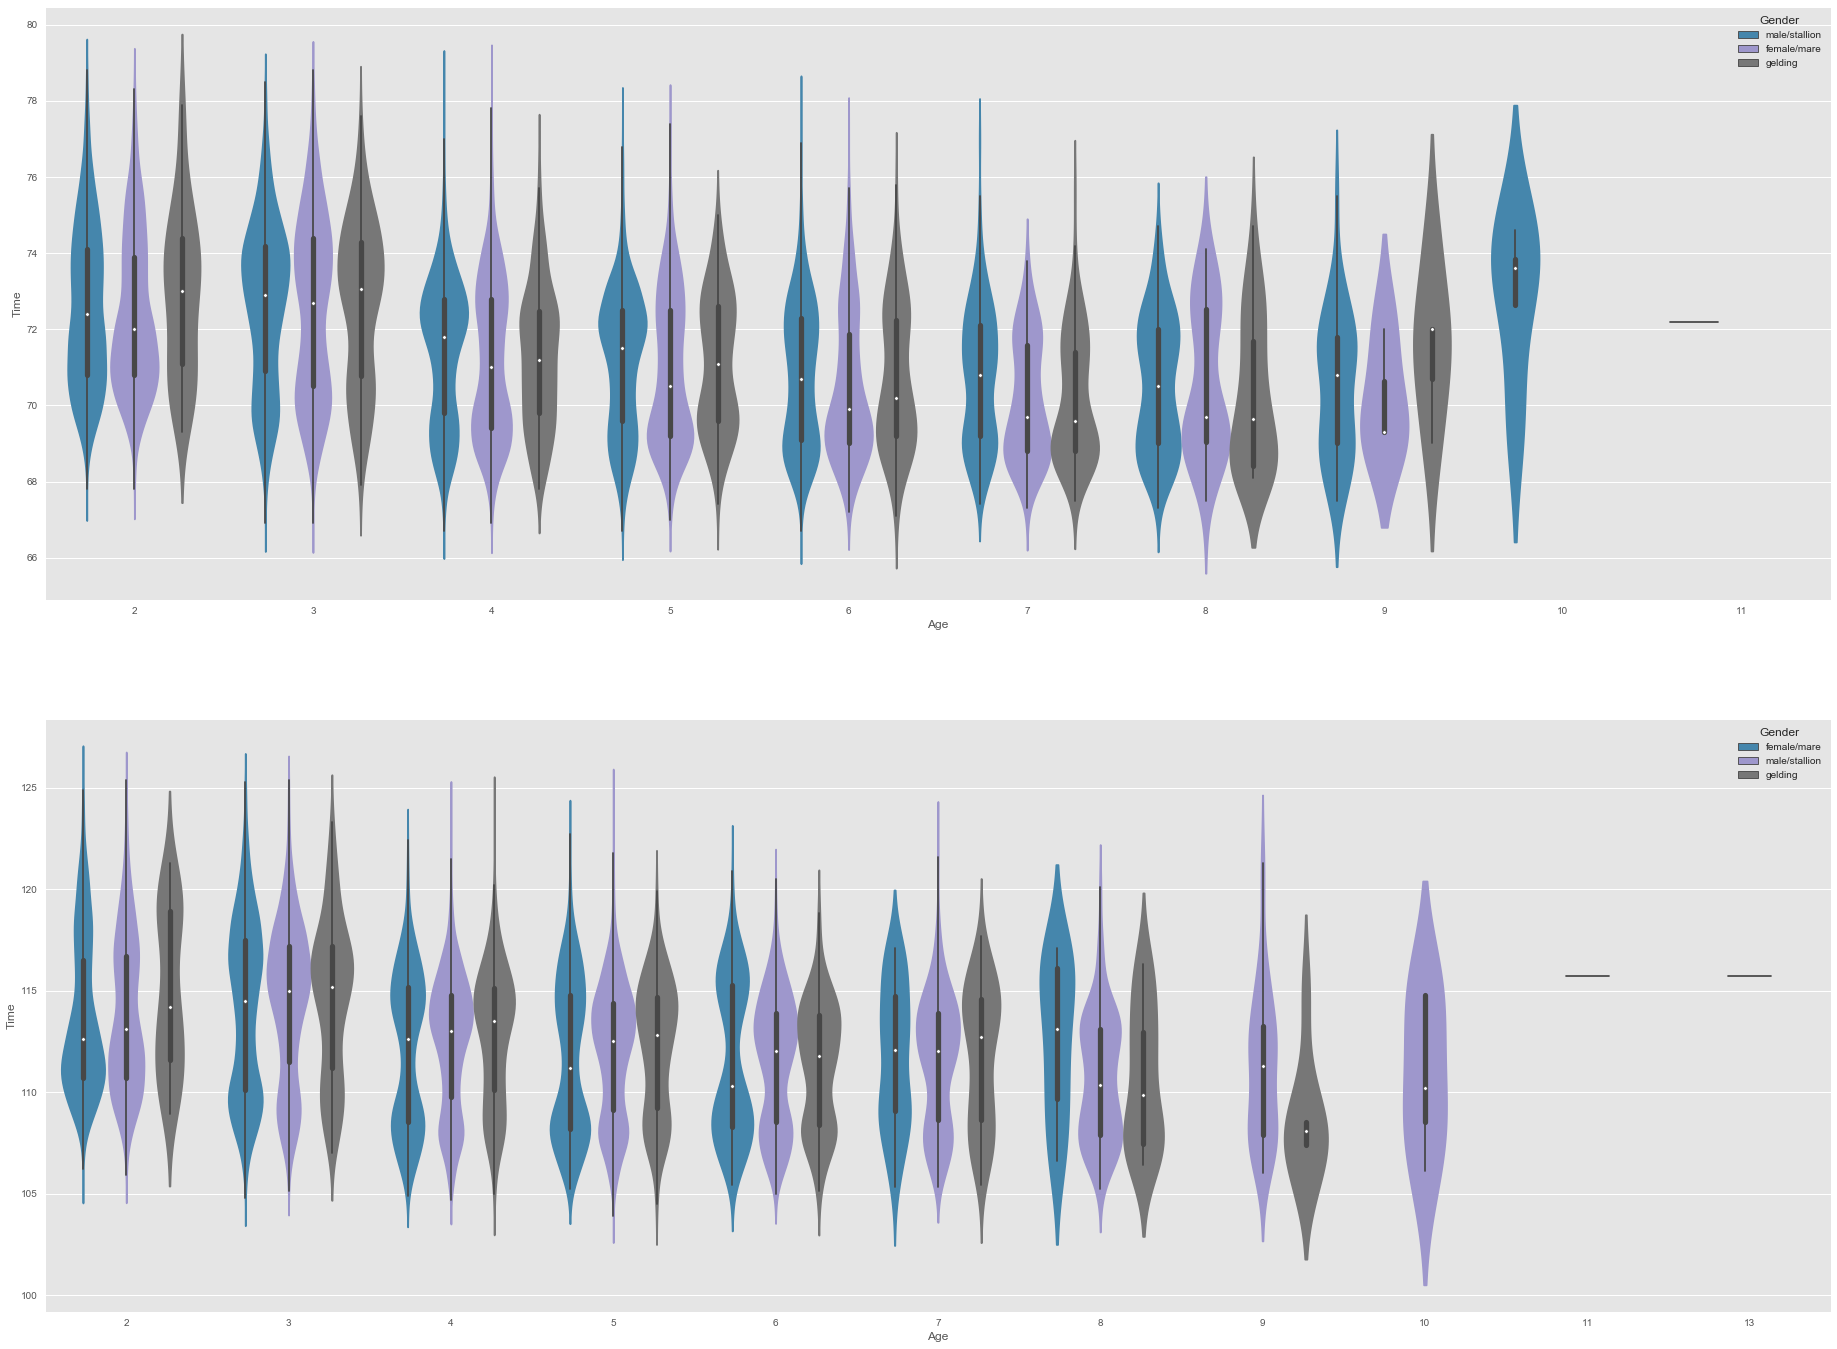

In [6]:
fig, ax = plt.subplots(2, 1)
sns.violinplot(x='Age', y='Time', hue='Gender', data=race_data_1200_age_gender, ax=ax[0])
sns.violinplot(x='Age', y='Time', hue='Gender', data=race_data_1800_age_gender, ax=ax[1])

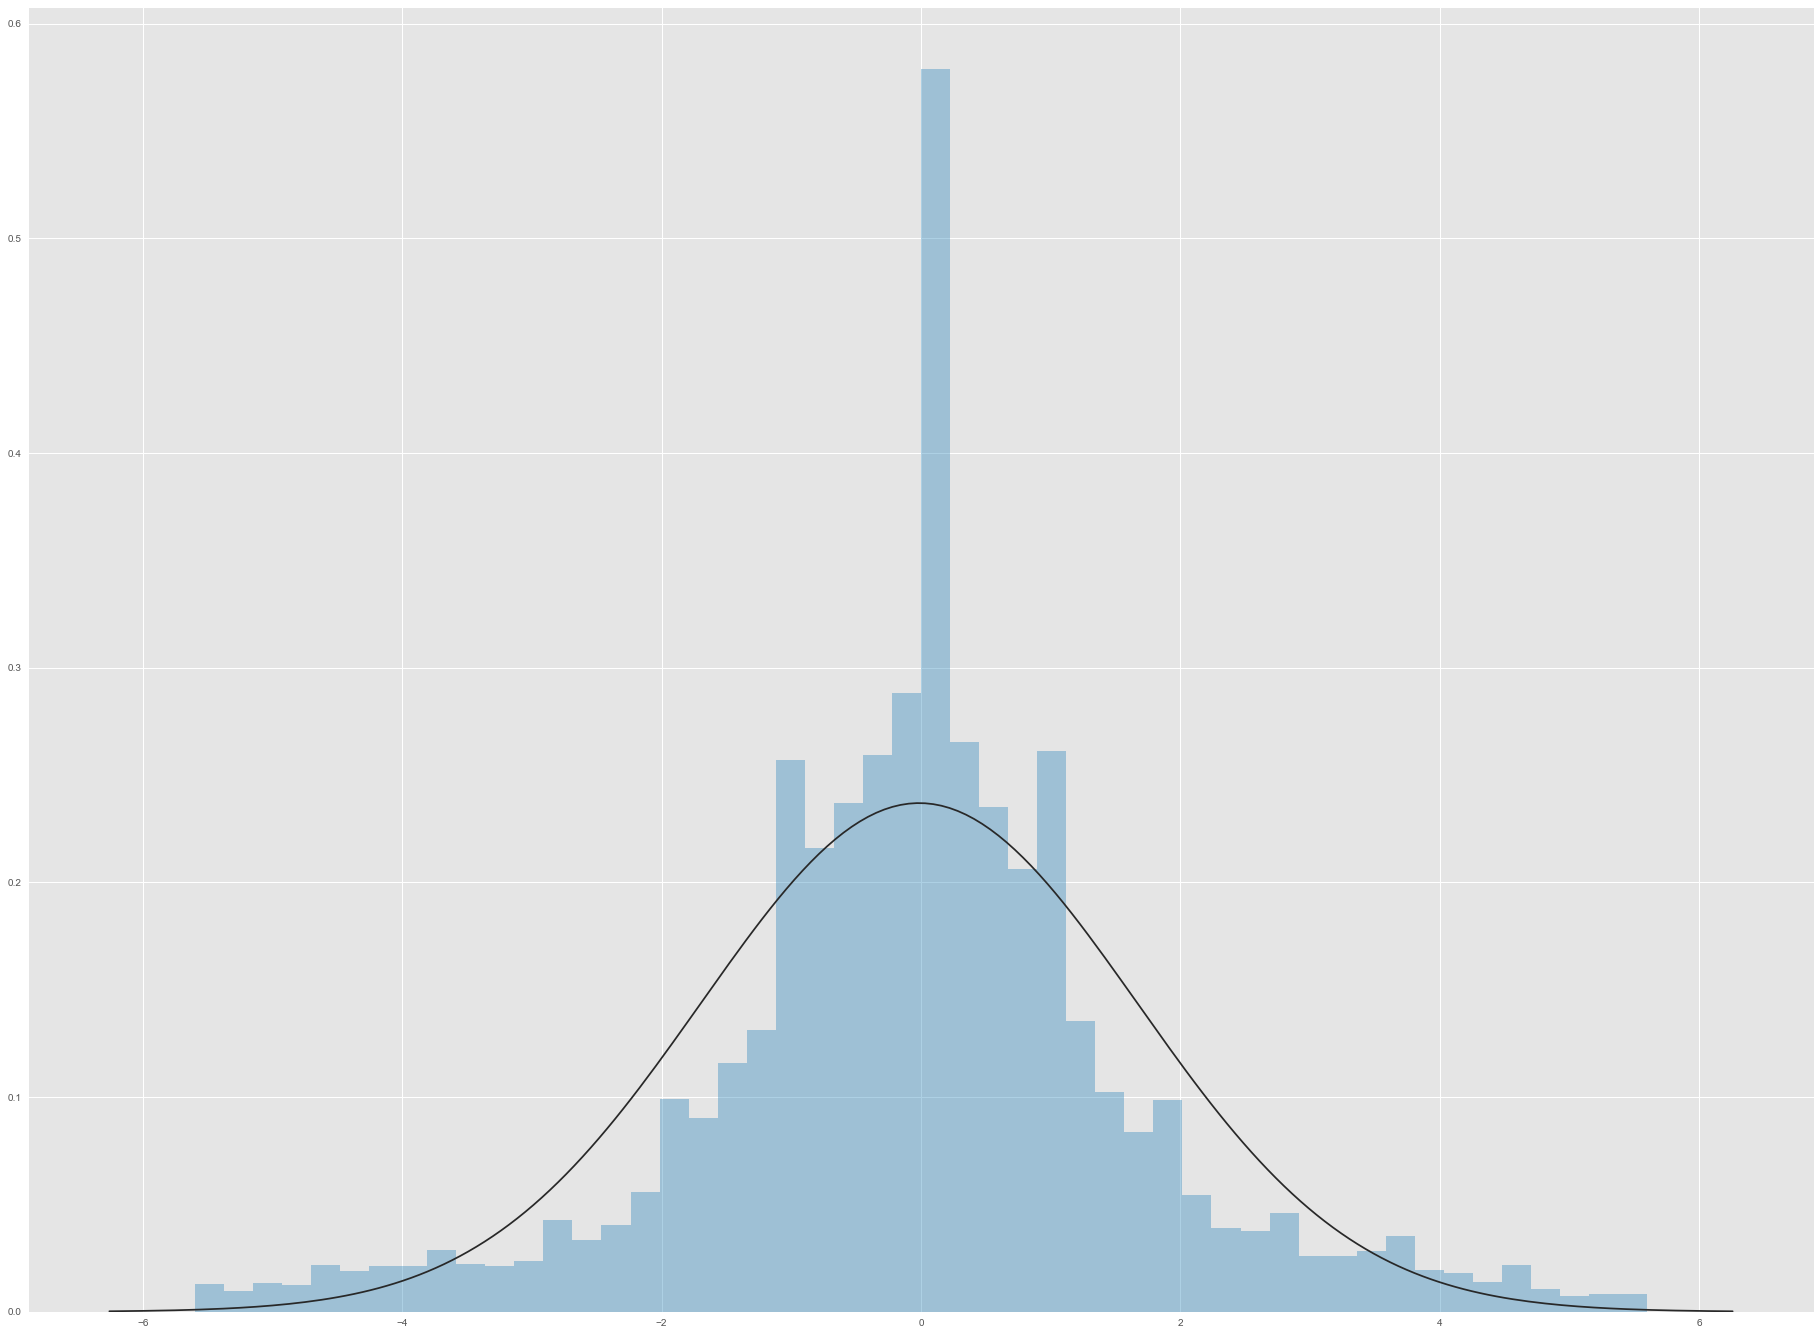

In [7]:
from functools import reduce
from scipy.stats import norm
def get_residual(time_date_list, max_diff=pd.Timedelta(weeks=26.0714)):
    residual_list = []
    time_date_list = sorted(time_date_list, key=lambda x: pd.Timestamp(x.split(':')[1]))
    time_date_list = list(map(lambda x: x.split(':'), time_date_list))
    for index in range(1, len(time_date_list)):
        if pd.Timestamp(time_date_list[index][1]) - pd.Timestamp(time_date_list[index-1][1]) <= max_diff:
            residual_list.append(float(time_date_list[index][0]) - float(time_date_list[index-1][0]))
    return residual_list      

race_data_1200_sorted = race_data_1200.loc[:, ['Date', 'Race Name',
                                               'Name', 'Age', 'Gender', 'Net Weight', 'Weight Change',
                                               'Popularity', 'No. of Contestants', 'Distance', 
                                               'Temp. Rank', 'Time', 'Time (Last 600m)', 'Odds', 'Rank']]\
                                           .sort_values('Race Name').sort_values('Date').sort_values('Name')
race_data_1200_sorted[['Time', 'Time (Last 600m)']] = race_data_1200_sorted[['Time', 'Time (Last 600m)']].astype(str)
race_data_1200_sorted['Time:Date'] = race_data_1200_sorted['Time'].str.cat(race_data_1200_sorted['Date'], sep=':')
time_aggregate = race_data_1200_sorted.groupby('Name')['Time:Date'].aggregate(lambda x: reduce((lambda x, y: x + ',' + y), x))
time_residual = time_aggregate.apply(lambda x: x.split(',')).apply(lambda y: get_residual(y))
time_residual_list = list(time_residual)
time_residual_list = [element for lst in time_residual_list for element in lst]

time_residual_series = pd.Series(time_residual_list)
sns.distplot(time_residual_series[abs(stats.zscore(time_residual_series)) <= 3], fit=norm, kde=False)

NormaltestResult(statistic=870.81640905222309, pvalue=8.0282224735978401e-190)


((array([-4.04437554, -3.83153821, -3.71521335, ...,  3.71521335,
          3.83153821,  4.04437554]),
  array([-5.6, -5.6, -5.6, ...,  5.6,  5.6,  5.6])),
 (1.65590070601571, -0.014573872237359476, 0.98352078228669415))

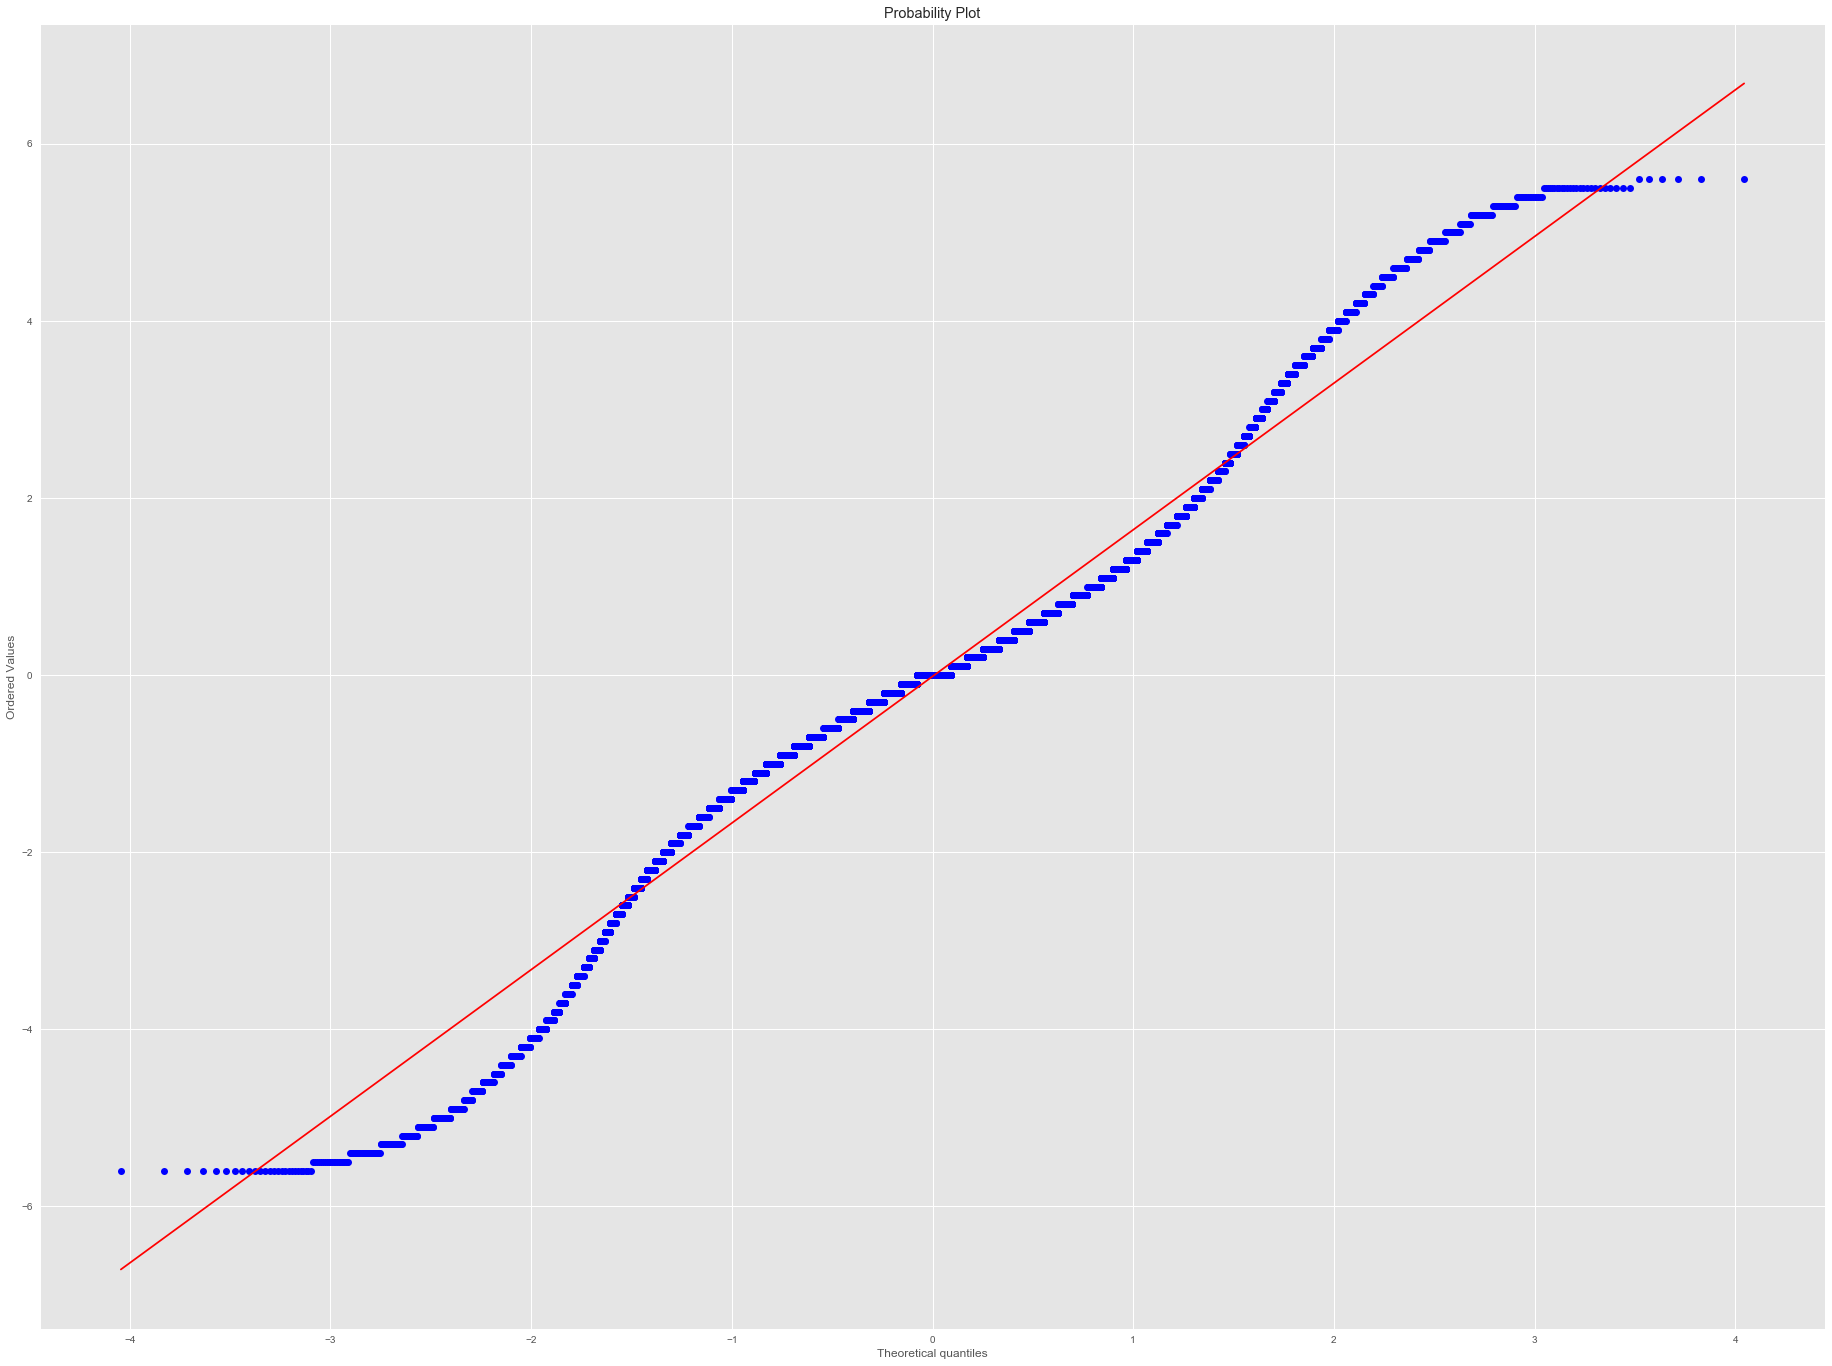

In [8]:
print(stats.mstats.normaltest(time_residual_series[abs(stats.zscore(time_residual_series)) <= 3]))
stats.probplot(time_residual_series[abs(stats.zscore(time_residual_series)) <= 3], dist='norm', plot=plt)

In [9]:
import sys
def best_fit_distribution(data, bins=200, ax=None):
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0
    DISTRIBUTIONS = [        
        stats.alpha,stats.anglit,stats.arcsine,stats.beta,stats.betaprime,stats.bradford,stats.burr,stats.cauchy,stats.chi,stats.chi2,stats.cosine,
        stats.dgamma,stats.dweibull,stats.erlang,stats.expon,stats.exponnorm,stats.exponweib,stats.exponpow,stats.f,stats.fatiguelife,stats.fisk,
        stats.foldcauchy,stats.foldnorm,stats.frechet_r,stats.frechet_l,stats.genlogistic,stats.genpareto,stats.gennorm,stats.genexpon,
        stats.genextreme,stats.gausshyper,stats.gamma,stats.gengamma,stats.genhalflogistic,stats.gilbrat,stats.gompertz,stats.gumbel_r,
        stats.gumbel_l,stats.halfcauchy,stats.halflogistic,stats.halfnorm,stats.halfgennorm,stats.hypsecant,stats.invgamma,stats.invgauss,
        stats.invweibull,stats.johnsonsb,stats.johnsonsu,stats.ksone,stats.kstwobign,stats.laplace,stats.levy,stats.levy_l,stats.levy_stable,
        stats.logistic,stats.loggamma,stats.loglaplace,stats.lognorm,stats.lomax,stats.maxwell,stats.mielke,stats.nakagami,stats.ncx2,stats.ncf,
        stats.nct,stats.norm,stats.pareto,stats.pearson3,stats.powerlaw,stats.powerlognorm,stats.powernorm,stats.rdist,stats.reciprocal,
        stats.rayleigh,stats.rice,stats.recipinvgauss,stats.semicircular,stats.t,stats.triang,stats.truncexpon,stats.truncnorm,stats.tukeylambda,
        stats.uniform,stats.vonmises,stats.vonmises_line,stats.wald,stats.weibull_min,stats.weibull_max,stats.wrapcauchy
    ]
    best_distribution = stats.norm
    best_params = (-0.014573872237359967, 2.8339301972446616)
    best_sse = np.inf
    for distribution in DISTRIBUTIONS:
        try:
            sys.stdout.write('current_distribution: %s, best_distribution: %s, best_sse: %f\r' \
                             % (distribution.name, best_distribution.name, best_sse))
            sys.stdout.flush()
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')
                params = distribution.fit(data)
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse
        except Exception:
            pass
    return (best_distribution, best_params)

def make_pdf(dist, params, size=10000):
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)
    return pdf

In [10]:
best_dist = best_fit_distribution(time_residual_series[abs(stats.zscore(time_residual_series)) <= 3])
pdf = make_pdf(best_dist[0], best_dist[1])

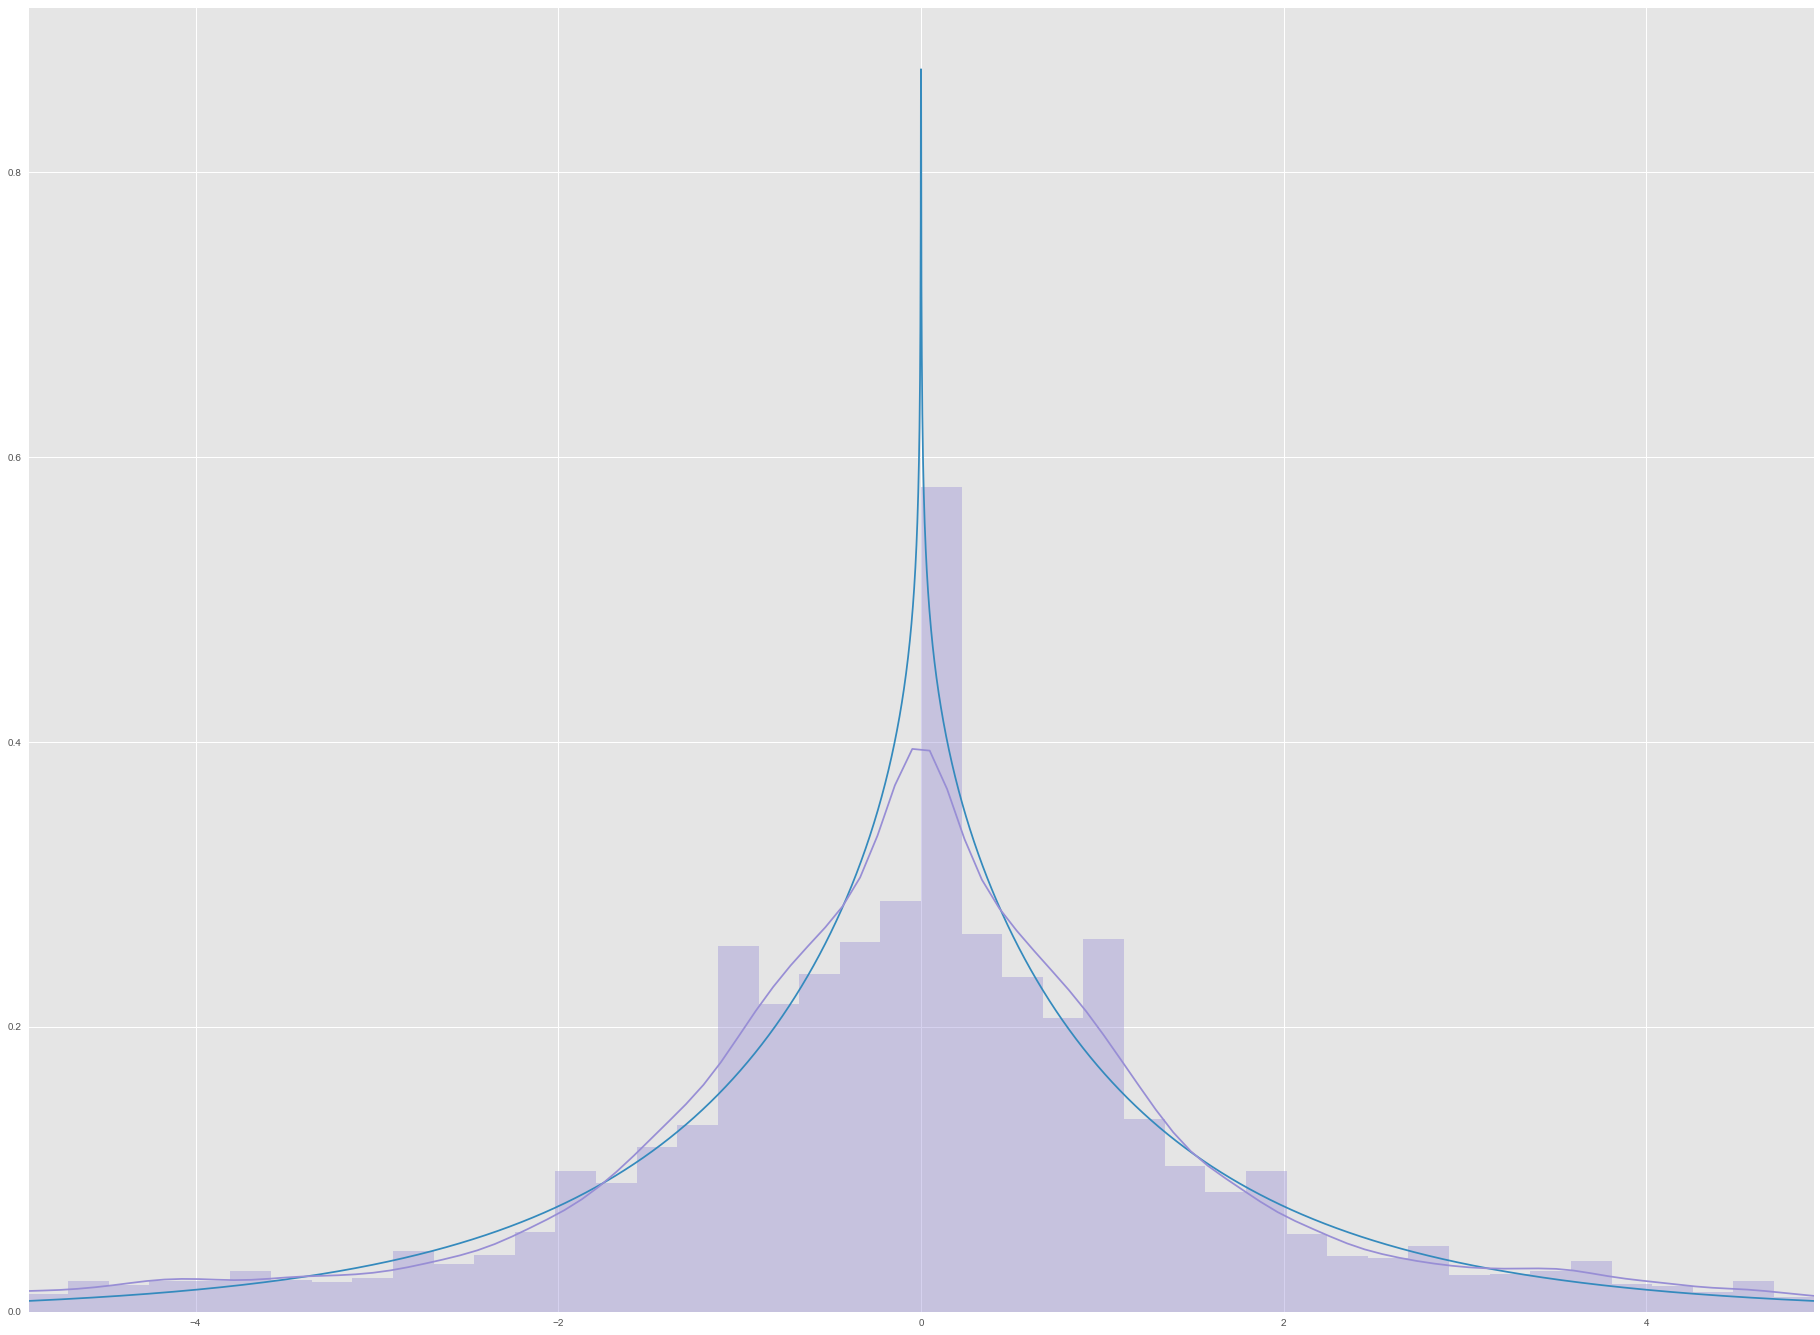

In [11]:
pdf.plot()
sns.distplot(time_residual_series[abs(stats.zscore(time_residual_series)) <= 3])

In [12]:
best_dist

(<scipy.stats._continuous_distns.dgamma_gen at 0x1bfd133c400>,
 (0.88175219056520859, 2.5347079714271089e-32, 1.3480084311189486))

In [190]:
selected_columns = ['Date', 'Place', 'Race Name', 'Distance', 'No. of Contestants',
                    'Name', 'Gender', 'Track No.', 'Track Cat.', 'Odds',
                    'Time', 'Rank']
n = 8
race_data_1200_n_horses = race_data_1200.loc[(stats.zscore(race_data_1200['Time']) < 3) & (race_data_1200['No. of Contestants'] == n), selected_columns]
horse_first_time = race_data_1200.groupby('Name').agg({'Date': 'min'}).reset_index()
horse_first_time.columns = ['Name', 'First Date']
race_data_1200_n_horses_merged = race_data_1200_n_horses.merge(horse_first_time, on='Name')
race_data_1200_n_horses_merged['IsFirstTime'] = race_data_1200_n_horses_merged['Date'] <= race_data_1200_n_horses_merged['First Date']
race_first_time_horse_num = race_data_1200_n_horses_merged.groupby(['Date', 'Race Name']).agg({'IsFirstTime': 'sum'}).reset_index()
race_name_list = list(race_first_time_horse_num.loc[race_first_time_horse_num['IsFirstTime'] == 0, 'Race Name'])
time_aggregated_sorted = pd.Series(time_aggregate.apply(lambda element: sorted(list(map(lambda x: x.split(':'), element.split(','))), key=lambda y: pd.Timestamp(y[1]))), name='Time List')
race_data_1200_examples = race_data_1200_n_horses_merged.loc[race_data_1200_n_horses_merged['Race Name'].apply(lambda x: x in race_name_list)].join(time_aggregated_sorted, on='Name')
past_record_series = race_data_1200_examples.apply(lambda row: list(filter(lambda y: pd.Timestamp(y[1]) < pd.Timestamp(row['Date']), 
                                                                           sorted(row['Time List'], 
                                                                                  key=lambda x: abs(pd.Timestamp(x[1]) - pd.Timestamp(row['Date']))))), 
                                                   axis=1)
race_data_1200_examples['Last Race Date'] = past_record_series.apply(lambda x: pd.Timestamp(x[0][1]))
race_data_1200_examples['Last Race Time'] = past_record_series.apply(lambda x: x[0][0])
race_data_1200_examples.drop(['IsFirstTime', 'Time List'], axis=1, inplace=True)

In [191]:
race_data_1200_examples

,Date,Place,Race Name,Distance,No. of Contestants,Name,Gender,Track No.,Track Cat.,Odds,Time,Rank,First Date,Last Race Date,Last Race Time
31,2014-08-17,新潟,飯豊特別,1200,8,プロスペラスマム,female/mare,7,7,70.3,70.4,7,2013-02-23,2014-07-26,69.5
49,2014-08-17,新潟,飯豊特別,1200,8,フギン,female/mare,1,1,1.5,69.4,1,2013-08-25,2014-06-22,69.5
50,2014-08-17,新潟,飯豊特別,1200,8,シンボリディスコ,male/stallion,2,2,3.6,69.6,2,2014-07-19,2014-07-19,69.5
51,2014-08-17,新潟,飯豊特別,1200,8,エクセレントピーク,female/mare,3,3,17.8,70.0,3,2013-01-27,2014-07-26,69.6
52,2014-08-17,新潟,飯豊特別,1200,8,アブマーシュ,female/mare,5,5,7.3,70.0,4,2013-02-23,2014-07-26,69.4
53,2014-08-17,新潟,飯豊特別,1200,8,トーセンシルエット,female/mare,4,4,13.2,70.1,5,2013-07-21,2014-07-26,70.0
54,2014-08-17,新潟,飯豊特別,1200,8,キンショーユウジャ,male/stallion,6,6,46.4,70.2,6,2013-01-12,2014-04-06,73.3
55,2014-08-17,新潟,飯豊特別,1200,8,デイジーギャル,female/mare,8,8,23.8,71.0,8,2014-07-06,2014-07-06,68.4
